In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
import seaborn  as sns
import statsmodels.api as sm 

from pandas.core.frame import DataFrame
from glassnode import *
from tqdm import tqdm
from utilities import ohlc_plot

from LassoFeatImportance import *

plt.rcParams['figure.figsize'] = [15, 7]
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
sns.set()

In [2]:
# selected_indicators = pd.read_pickle('selected_indicators.pkl')

In [3]:
# GLASSNODE_API_KEY = '1vUcyF35hTk9awbNGszF0KcLuYH'

# self = GlassnodeClient()
# self.set_api_key(GLASSNODE_API_KEY)


# Metrics = {'Indicators':Indicators,
#            'Market':Market,
#            'Mining':Mining,
#            'Supply':Supply,
#            'Addresses':Addresses,
#            'Transactions':Transactions,
#            'Blockchain':Blockchain,
#            'Derivatives':Derivatives,
#            'Distribution':Distribution,
#            'Entities':Entities,
#            'Institutions':Institutions}


# DataDict = {}
# series = {}
# dataframes = {}
# catalog = {}

# for group in Metrics:
#     DataDict[group] = {}
#     series[group] = []
#     dataframes[group] = []
#     catalog[group] = []

In [4]:
# for group in tqdm(['Market']): #list(Metrics.keys())
    
#     metric = Metrics[group]

#     for m in metric:
#         df = pd.DataFrame()
        
#         url = URLS[group] + m
#         a ='BTC'
#         c = 'native'
#         i='24h'

#         df = self.get(url,a,i,c)
        
#         if isinstance(df,pd.DataFrame):
#             dataframes[group].append(m)
#         else:
#             series[group].append(m)
            
#         DataDict[group][group.lower()+'_'+m] = df
        
#         try:
#             start_date = df.index[0].strftime('%Y-%m-%d')
#             end_date = df.index[-1].strftime('%Y-%m-%d')
            
#             if isinstance(df,pd.DataFrame):
#                 N_NaNs = df.iloc[:,0].isna().sum()
#             else:
#                 N_NaNs = df.isna().sum()
                
#         except:
#             start_date,end_date,N_NaNs
            
#         catalog[group].append({'Name':m,'start_date':start_date,'end_date':end_date,'N_NaNs':N_NaNs})
        
#     catalog[group] = pd.DataFrame(catalog[group])


In [5]:
# names = selected_indicators.groupby('group')['vars'].apply(lambda x: x.tolist())

# df = []
# for name in names.index:
#     lst = names.loc[name]
#     for l in lst:
#         df.append(DataDict[name][l])
        
# df = pd.concat(df,axis = 1)
        

In [6]:
GLASSNODE_API_KEY = '1vUcyF35hTk9awbNGszF0KcLuYH'

self = GlassnodeClient()
self.set_api_key(GLASSNODE_API_KEY)

url = URLS['Market'] + 'price_usd_ohlc'
a ='BTC'
c = 'native'
i='24h'

price = self.get(url,a,i,c)

In [7]:
selected = pd.read_pickle('table_selected.pkl').astype('float32')
empties = selected.loc['2014':].isna().groupby(selected.loc['2014':].index.year).sum().iloc[-2:].sum()
nonans = empties.loc[empties == 0].index

AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from '/Users/orentapiero/miniforge3/envs/tensorenv/lib/python3.8/site-packages/pandas/core/internals/blocks.py'>

In [31]:
df = selected[nonans].loc['2012':]

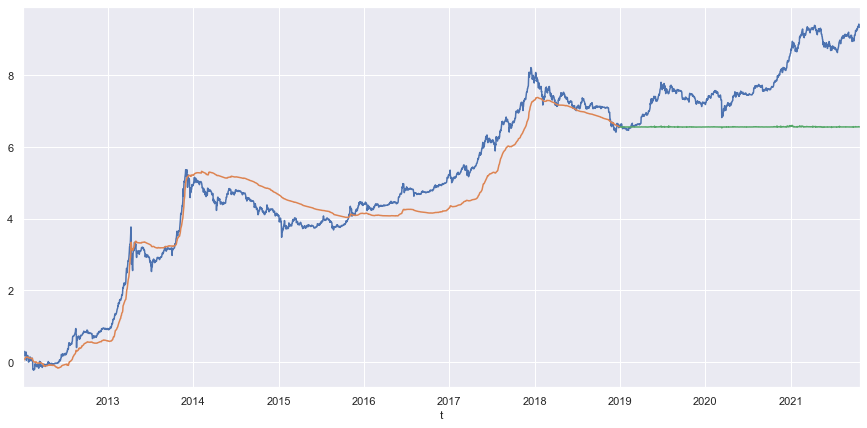

In [107]:
x = np.log(df['market_deltacap_usd']).diff().dropna()
y = np.log(price['c']).diff().loc[x.index]

X = sm.add_constant(x)

mod = sm.OLS(y.loc[:'2018'],X.loc[:'2018']).fit()
mod1 = sm.OLS(y,X).fit()

y.cumsum().plot()
mod.fittedvalues.cumsum().plot()
(mod.predict(X.loc['2019':])+mod.fittedvalues.cumsum()[-1]).plot()

implied_delta_cap = pd.concat([mod.fittedvalues,mod.predict(X.loc['2019':])],axis = 0).sort_index()

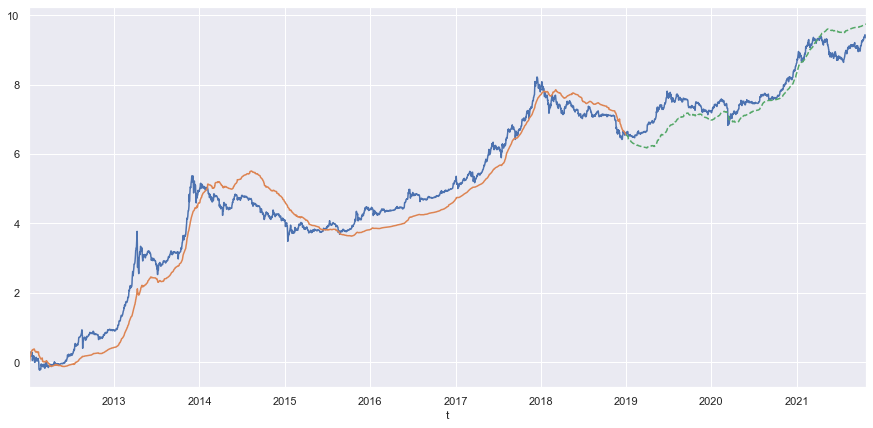

In [108]:
x = df['indicators_sopr'].iloc[1:]
y = np.log(price['c']).diff().dropna().loc[x.index]

X = sm.add_constant(x)

mod = sm.OLS(y.loc[:'2018'],X.loc[:'2018']).fit()
mod1 = sm.OLS(y,X).fit()

y.cumsum().plot()
mod.fittedvalues.cumsum().plot()
(mod.predict(X.loc['2019':]).cumsum()+mod.fittedvalues.cumsum()[-1]).plot(style = '--')

implied_sopr = pd.concat([mod.fittedvalues,mod.predict(X.loc['2019':])],axis = 0).sort_index()

<AxesSubplot:xlabel='t'>

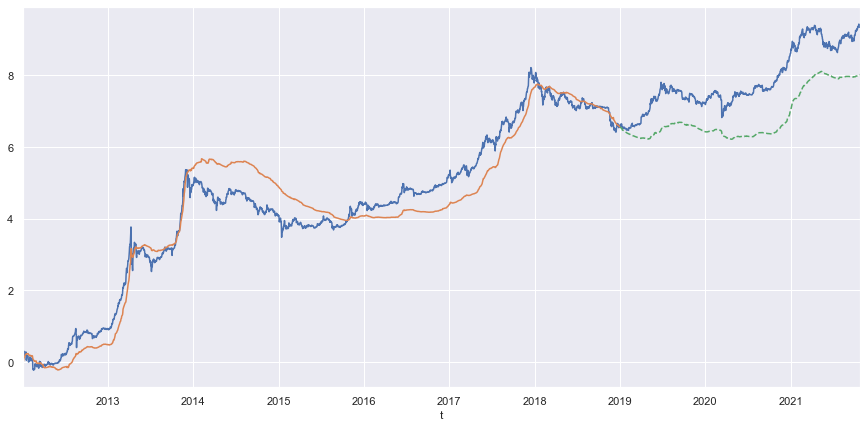

In [109]:
x = pd.concat([df['indicators_sopr'],
               np.log(df['market_deltacap_usd']).diff()],axis = 1).dropna()

y = np.log(price['c']).diff().dropna().loc[x.index]

X = sm.add_constant(x)

mod = sm.OLS(y.loc[:'2018'],X.loc[:'2018']).fit()
mod1 = sm.OLS(y,X).fit()

implied_sopr_delta_cap = pd.concat([mod.fittedvalues,mod.predict(X.loc['2019':])],axis = 0).sort_index()

y.cumsum().plot()
mod.fittedvalues.cumsum().plot()
(mod.predict(X.loc['2019':]).cumsum()+mod.fittedvalues.cumsum()[-1]).plot(style = '--')

<AxesSubplot:xlabel='t'>

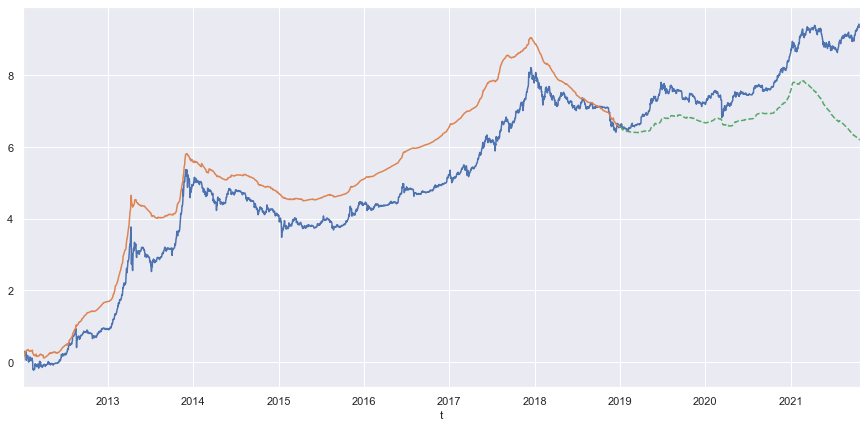

In [117]:
x = pd.concat([df['indicators_sopr'],
               np.log(df['market_deltacap_usd']).diff(),
               df['mining_marketcap_thermocap_ratio']],axis = 1).dropna()

y = np.log(price['c']).diff().dropna().loc[x.index]

X = sm.add_constant(x)

mod = sm.OLS(y.loc[:'2018'],X.loc[:'2018']).fit()
mod1 = sm.OLS(y,X).fit()

implied_sopr_delta_cap_mtr = pd.concat([mod.fittedvalues,mod.predict(X.loc['2019':])],axis = 0).sort_index()

y.cumsum().plot()
mod.fittedvalues.cumsum().plot()
(mod.predict(X.loc['2019':]).cumsum()+mod.fittedvalues.cumsum()[-1]).plot(style = '--')

<AxesSubplot:xlabel='t'>

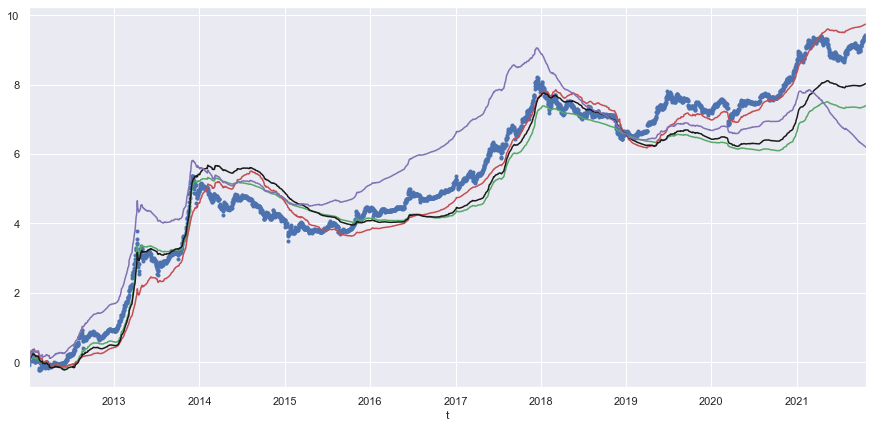

In [118]:
y.cumsum().plot(style = '.')
implied_delta_cap.cumsum().plot(style = 'g-')
implied_sopr.cumsum().plot(style ='r-')
implied_sopr_delta_cap.cumsum().plot(style = 'k-')
implied_sopr_delta_cap_mtr.cumsum().plot(style = 'm-')

<AxesSubplot:xlabel='t'>

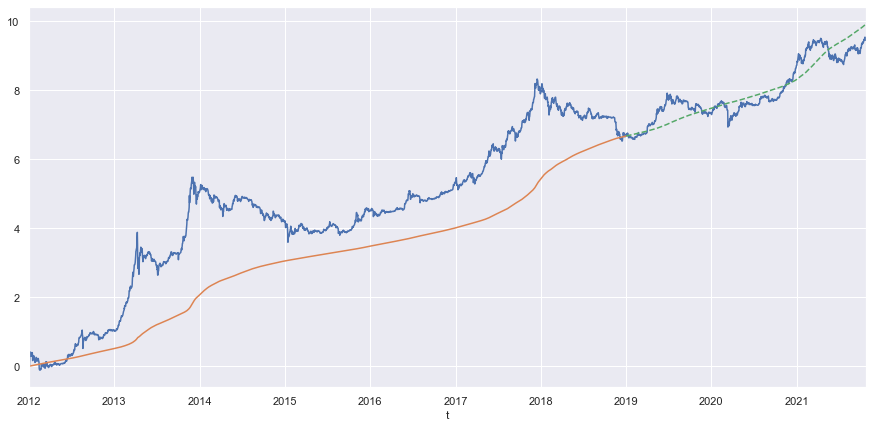

In [126]:
x = (df['mining_marketcap_thermocap_ratio']).dropna()
y = np.log(price['c']).diff().dropna().loc[x.index]

X = sm.add_constant(x)

mod = sm.OLS(y.loc[:'2018'],X.loc[:'2018']).fit()
mod1 = sm.OLS(y,X).fit()

implied_mtr = pd.concat([mod.fittedvalues,mod.predict(X.loc['2019':])],axis = 0).sort_index()

y.cumsum().plot()
mod.fittedvalues.cumsum().plot()
(mod.predict(X.loc['2019':]).cumsum()+mod.fittedvalues.cumsum()[-1]).plot(style = '--')